In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import joblib

In [40]:
file_path = r'Dataset\cleaned_heart_failure_dataset_2.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

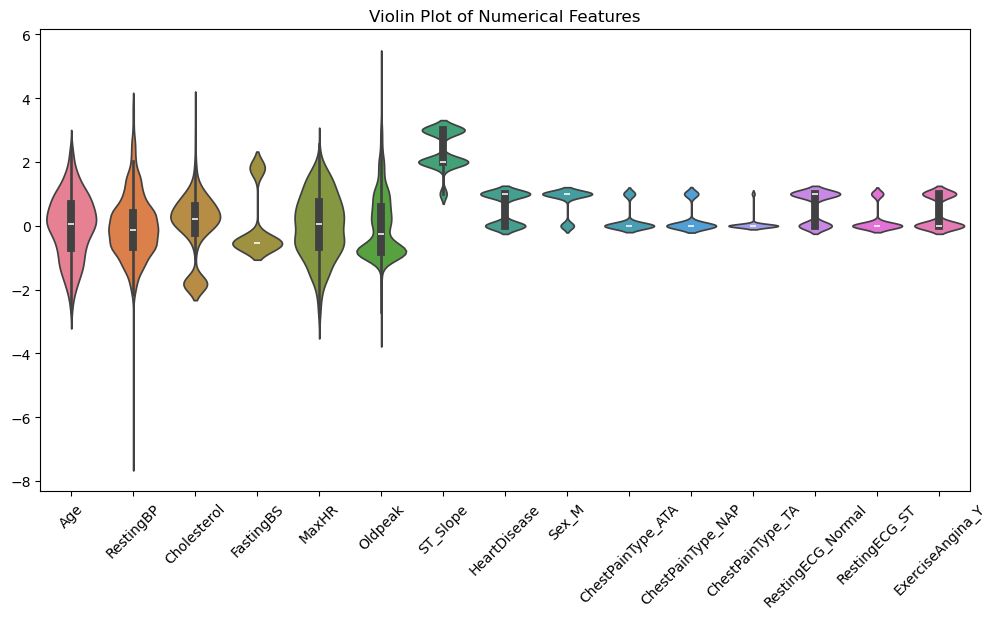

In [41]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Violin Plot of Numerical Features")
plt.show()


In [42]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,3,0,True,True,False,False,True,False,False
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,2,1,False,False,True,False,True,False,False
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,3,0,True,True,False,False,False,True,False
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,2,1,False,False,False,False,True,False,True
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,3,0,True,False,True,False,True,False,False


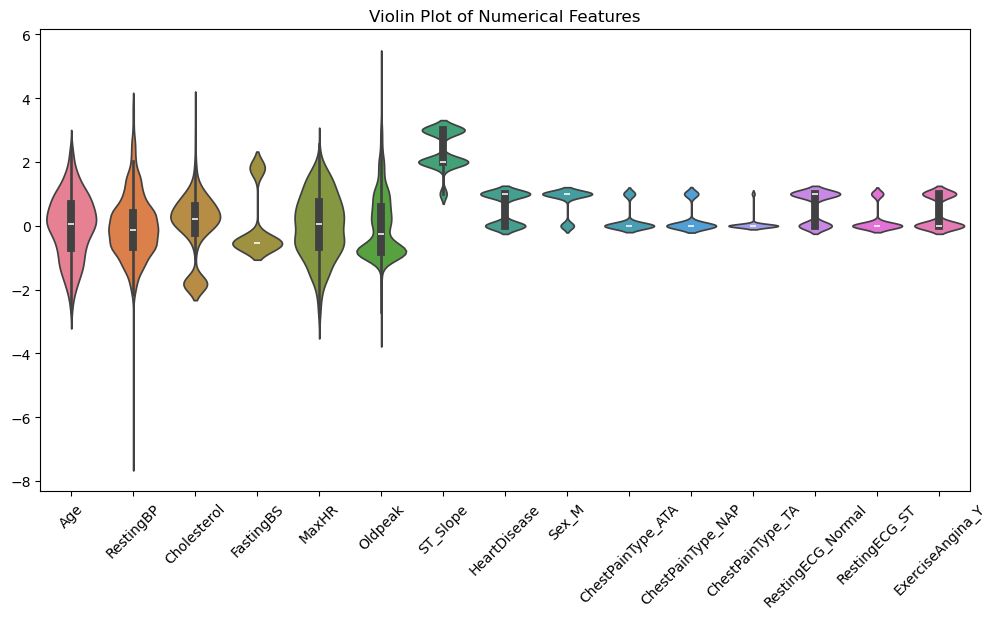

In [43]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Violin Plot of Numerical Features")
plt.show()


In [44]:
for x in df.columns:
    print(x)
    print(df[x].mean())
    print('==================')

Age
-1.0836163726188892e-16
RestingBP
2.147882452869584e-16
Cholesterol
0.0
FastingBS
-3.096046778911112e-17
MaxHR
4.95367484625778e-16
Oldpeak
1.238418711564445e-16
ST_Slope
2.3616557734204795
HeartDisease
0.5533769063180828
Sex_M
0.789760348583878
ChestPainType_ATA
0.18845315904139434
ChestPainType_NAP
0.22113289760348584
ChestPainType_TA
0.05010893246187364
RestingECG_Normal
0.6013071895424836
RestingECG_ST
0.19389978213507625
ExerciseAngina_Y
0.40413943355119825


In [45]:
# Define the target variable and features
X = df.drop(columns=['HeartDisease'])  # Features
y = df['HeartDisease']  # Target variable

# pca = PCA(n_components=5)  # Adjust as needed
# X_pca = pca.fit_transform(X)  # Use your scaled data
# X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])


# Assume X and y are your features and labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

# Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)


# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (642, 14), X_test shape: (138, 14)
y_train shape: (642,), y_test shape: (138,)


In [46]:
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [47]:

param_grid = {
    "n_estimators": [100, 300],  
    "max_depth": [3, 6],  
    "learning_rate": [0.01, 0.1, 0.2],  
    "gamma": [0, 0.1, 0.3],  
    "subsample": [0.8, 1.0],  
    "colsample_bytree": [0.8, 1.0]  
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss"), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


c:\Users\LENOVO\anaconda3\envs\comp_vision\lib\site-packages\xgboost\core.py:158: UserWarning: [16:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [48]:
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="error",
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=500,
    subsample=0.9,
    reg_lambda=1,
    alpha=1
)
# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

c:\Users\LENOVO\anaconda3\envs\comp_vision\lib\site-packages\xgboost\core.py:158: UserWarning: [16:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        61
           1       0.96      0.91      0.93        77

    accuracy                           0.93       138
   macro avg       0.93      0.93      0.93       138
weighted avg       0.93      0.93      0.93       138



In [49]:
y_val_pred = xgb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.86

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        62
           1       0.85      0.91      0.88        76

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138



In [50]:
# Define the base model
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)


# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        61
           1       0.95      0.96      0.95        77

    accuracy                           0.95       138
   macro avg       0.95      0.95      0.95       138
weighted avg       0.95      0.95      0.95       138



In [51]:
y_val_pred_rf = best_rf.predict(X_val)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

print(f"Validation Accuracy: {val_accuracy_rf:.2f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_rf))

Validation Accuracy: 0.86

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        62
           1       0.84      0.91      0.87        76

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.85       138



In [75]:
model = keras.Sequential([
    # First hidden layer
    layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    # Second hidden layer
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Third hidden layer
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),

    # Fourth hidden layer
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),

    # Fifth hidden layer (Optional, adding depth)
    layers.Dense(16, activation="relu"),

    # Output layer
    layers.Dense(1, activation="sigmoid")  # Change to softmax for multi-class
])

In [53]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 732 to 481
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                138 non-null    float64
 1   RestingBP          138 non-null    float64
 2   Cholesterol        138 non-null    float64
 3   FastingBS          138 non-null    float64
 4   MaxHR              138 non-null    float64
 5   Oldpeak            138 non-null    float64
 6   ST_Slope           138 non-null    int64  
 7   Sex_M              138 non-null    bool   
 8   ChestPainType_ATA  138 non-null    bool   
 9   ChestPainType_NAP  138 non-null    bool   
 10  ChestPainType_TA   138 non-null    bool   
 11  RestingECG_Normal  138 non-null    bool   
 12  RestingECG_ST      138 non-null    bool   
 13  ExerciseAngina_Y   138 non-null    bool   
dtypes: bool(7), float64(6), int64(1)
memory usage: 9.6 KB


In [54]:
y_val.info()

<class 'pandas.core.series.Series'>
Index: 138 entries, 732 to 481
Series name: HeartDisease
Non-Null Count  Dtype
--------------  -----
138 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [55]:
X_train = X_train.astype(float)
X_val = X_val.astype(float)


In [76]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 3s 34ms/step - loss: 0.6203 - accuracy: 0.6402 - val_loss: 0.6091 - val_accuracy: 0.8188
Epoch 2/100
21/21 [==============================] - 0s 8ms/step - loss: 0.4392 - accuracy: 0.8115 - val_loss: 0.5677 - val_accuracy: 0.8188
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4004 - accuracy: 0.8271 - val_loss: 0.5497 - val_accuracy: 0.7754
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4012 - accuracy: 0.8287 - val_loss: 0.5228 - val_accuracy: 0.7754
Epoch 5/100
21/21 [==============================] - 0s 9ms/step - loss: 0.3657 - accuracy: 0.8333 - val_loss: 0.5026 - val_accuracy: 0.7754
Epoch 6/100
21/21 [==============================] - 0s 9ms/step - loss: 0.3524 - accuracy: 0.8474 - val_loss: 0.4760 - val_accuracy: 0.7681
Epoch 7/100
21/21 [==============================] - 0s 13ms/step - loss: 0.3473 - accuracy: 0.8551 - val_loss: 0.4484 - val_accuracy: 0.7899
Epoch 8/100

In [77]:
X_test = X_test.astype(float)

In [78]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
y_pred = model.predict(X_test)
print(y_pred[:20])  # Show first 5 predictions


5/5 [==============================] - 0s 6ms/step - loss: 0.2809 - accuracy: 0.8986
Test Accuracy: 0.8985507488250732
5/5 [==============================] - 1s 25ms/step
[[0.9174339 ]
 [0.00385862]
 [0.9850226 ]
 [0.96140856]
 [0.00452913]
 [0.8917289 ]
 [0.97970563]
 [0.9955325 ]
 [0.9868745 ]
 [0.8917289 ]
 [0.5255313 ]
 [0.7250449 ]
 [0.7250449 ]
 [0.98715454]
 [0.01179786]
 [0.9234317 ]
 [0.8335243 ]
 [0.99995524]
 [0.98896766]
 [0.01135037]]


In [79]:
a = [0 if x < 0.5 else 1 for x in y_pred[:20]]

In [80]:
a

[1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]

In [81]:
b = list(y_test[:20])

In [82]:
matches = [x == y for x, y in zip(a, b)]
print(matches)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True]


In [83]:
y_pred_xg = xgb_model.predict(X_test.iloc[[0]])
print(y_pred_xg)
y_pred_rf = best_rf.predict(X_test.iloc[[0]])
print(y_pred_rf)
y_pred = [0] if model.predict(X_test.iloc[[0]]) < 0.5 else [1]
print(y_pred)


[1]
[1]
1/1 [==============================] - 0s 242ms/step
[1]


In [84]:
def ensemble_classifier(t):
    counter_0 = 0
    counter_1 = 0
    y_pred_xg = xgb_model.predict(t)
    if y_pred_xg == [0]:
        counter_0 += 1
    else: 
        counter_1 += 1
    y_pred_rf = best_rf.predict(t)
    if y_pred_rf == [0]:
        counter_0 += 1
    else: 
        counter_1 += 1
    y_pred = [0] if model.predict(t) < 0.5 else [1]
    if y_pred == [0]:
        counter_0 += 1
    else: 
        counter_1 += 1
    if counter_0 > counter_1:
        return 0
    else:
        return 1



In [85]:
print(ensemble_classifier(X_test.iloc[[0]]))

1/1 [==============================] - 0s 117ms/step
1


In [86]:
y_pred = model.predict(X_val)

5/5 [==============================] - 0s 17ms/step


In [87]:
y_pred_nn = np.array([0 if x<0.5 else 1 for x in y_pred])
y_pred_nn

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0])

In [88]:
misclassified_indices_xg = np.where(y_val_pred != y_val)[0]
misclassified_indices_rf = np.where(y_val_pred_rf != y_val)[0]
misclassified_indices_nn = np.where(y_pred_nn != y_val)[0]

In [89]:
misclassified_indices_xg

array([  8,  18,  23,  24,  29,  34,  44,  56,  71,  83,  85,  93, 101,
       109, 115, 117, 122, 127, 128], dtype=int64)

In [90]:
misclassified_indices_rf

array([  8,  18,  23,  24,  29,  34,  44,  47,  51,  56,  71,  83,  85,
       101, 109, 115, 117, 122, 127, 128], dtype=int64)

In [91]:
misclassified_indices_nn

array([  8,  18,  25,  29,  34,  44,  50,  56,  71,  83,  85,  93,  95,
       101, 117, 122, 125, 127, 128, 137], dtype=int64)

In [95]:
X_train.iloc[0]

Age                  0.900464
RestingBP           -0.669935
Cholesterol         -1.818435
FastingBS            1.813758
MaxHR               -0.110403
Oldpeak             -1.582909
ST_Slope             2.000000
Sex_M                1.000000
ChestPainType_ATA    0.000000
ChestPainType_NAP    0.000000
ChestPainType_TA     1.000000
RestingECG_Normal    0.000000
RestingECG_ST        0.000000
ExerciseAngina_Y     0.000000
Name: 335, dtype: float64

In [100]:
joblib.dump(xgb_model, r'models\xgb_model.pkl')
joblib.dump(best_rf, r'models\rf_model.pkl')
model.save(r'models\keras_model.h5')